### Ejercicio Clase 1: XOR con NNet

#### Alumno: Lucas Rivela

#### Resolucion Teorica

<img src="./IMG_5028.jpg">

<img src="IMG_5029.jpg">

In [1]:
import math
import matplotlib.pyplot as plt
import random

In [39]:
# Defino inputs
input = [ [0,0], [0,1], [1,0], [1,1] ]
# Defino hiperparametros
n_epochs = 100
alfa = 0.01

In [40]:
# Defino funcion Sigmoid
def sigmoid(x):
    sig = 1 / (1 + math.exp(-x))
    return sig

In [41]:
# Inicializo variables con valores aleatorios
# Pesos y bias Neurona 1
w11_1 = random.uniform(0,1)
w12_1 = random.uniform(0,1)
b1_1 = random.uniform(0,1)
# Pesos y bias Neurona 2
w21_1 = random.uniform(0,1)
w22_1 = random.uniform(0,1)
b2_1 = random.uniform(0,1)
# Pesos y bias Neurona 3
w11_2 = random.uniform(0,1)
w12_2 = random.uniform(0,1)
b1_2 = random.uniform(0,1)


In [42]:
lista_MSE = []
for n in range(n_epochs):
    mse = 0
    for Xi1, Xi2 in input:
        # Forward
        # Primer capa
        Zi1_1 = w11_1 * Xi1 + w12_1 * Xi2 + b1_1
        Zi2_1 = w21_1 * Xi1 + w22_1 * Xi2 + b2_1
        ai1_1 = sigmoid(Zi1_1)
        ai2_1 = sigmoid(Zi2_1)
        # Segunda capa
        Zi1_2 = w11_2 * ai1_1 + w12_2 * ai2_1 + b1_2
        # Salida
        y_hat = Zi1_2
        y_true = 0 if Xi1 == Xi2 else 1

        # Error
        err = y_true - y_hat
        
        # Backpropagation
        L_w11_2 = -2 * err * ai1_1
        L_w12_2 = -2 * err * ai2_1
        L_b1_2 = -2 * err
        
        L_w11_1 = -2 * err * w11_2 * sigmoid(Zi1_1) * (1 - sigmoid(Zi1_1)) * Xi1
        L_w12_1 = -2 * err * w11_2 * sigmoid(Zi1_1) * (1 - sigmoid(Zi1_1)) * Xi2
        L_b1_1 = -2 * err * w11_2 * sigmoid(Zi1_1) * (1 - sigmoid(Zi1_1))

        L_w21_1 = -2 * err * w12_2 * sigmoid(Zi2_1) * (1 - sigmoid(Zi2_1)) * Xi1
        L_w22_1 = -2 * err * w12_2 * sigmoid(Zi2_1) * (1 - sigmoid(Zi2_1)) * Xi2
        L_b2_1 = -2 * err * w12_2 * sigmoid(Zi2_1) * (1 - sigmoid(Zi2_1))
        # Actualizar pesos
        # Pesos y bias Neurona 1
        w11_1 = w11_1 - alfa * L_w11_1
        w12_1 = w12_1 - alfa * L_w12_1
        b1_1 = b1_1 - alfa * L_b1_1
        # Pesos y bias Neurona 2
        w21_1 = w21_1 - alfa * L_w21_1
        w22_1 = w22_1 - alfa * L_w22_1
        b2_1 = b2_1 - alfa * L_b2_1
        # Pesos y bias Neurona 3
        w11_2 = w11_2 - alfa * L_w11_2
        w12_2 = w12_2 - alfa * L_w12_2
        b1_2 = b1_2 - alfa * L_b1_2

        # Calcular MSE
        mse += (y_true - y_hat)**2
    mse = mse/4
    lista_MSE.append(mse)

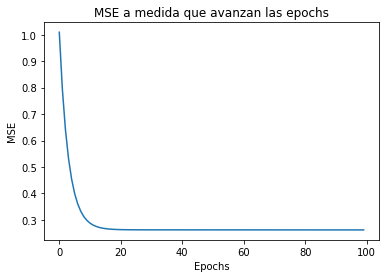

In [43]:
plt.title("MSE a medida que avanzan las epochs")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.plot(range(n_epochs), lista_MSE)

#### Armo todo como una clase para el predict

In [44]:
class NNetXor(object):
    __n_epochs = None
    __alfa = None
    __w11_1 = None
    __w12_1 = None
    __b1_1 = None
    __w21_1 = None
    __w22_1 = None
    __b2_1 = None
    __w11_2 = None
    __w12_2 = None
    __b1_2 = None
    __lista_MSE = None

    def __init__(self, n_epochs, alfa):
        self.__lista_MSE = []
        # Hiperparametros
        self.__n_epochs = n_epochs
        self.__alfa = alfa
        # Pesos y bias Neurona 1
        self.__w11_1 = random.uniform(0,1)
        self.__w12_1 = random.uniform(0,1)
        self.__b1_1 = random.uniform(0,1)
        # Pesos y bias Neurona 2
        self.__w21_1 = random.uniform(0,1)
        self.__w22_1 = random.uniform(0,1)
        self.__b2_1 = random.uniform(0,1)
        # Pesos y bias Neurona 3
        self.__w11_2 = random.uniform(0,1)
        self.__w12_2 = random.uniform(0,1)
        self.__b1_2 = random.uniform(0,1)

    @property
    def lista_MSE(self):
        return self.__lista_MSE

    def __sigmoid(self, x):
        sig = 1 / (1 + math.exp(-x))
        return sig

    def __calculateFirstLayer(self, Xi1, Xi2):
        Zi1_1 = self.__w11_1 * Xi1 + self.__w12_1 * Xi2 + self.__b1_1
        Zi2_1 = self.__w21_1 * Xi1 + self.__w22_1 * Xi2 + self.__b2_1
        ai1_1 = self.__sigmoid(Zi1_1)
        ai2_1 = self.__sigmoid(Zi2_1)
        return ai1_1, ai2_1

    def __calculateSecondLayer(self, ai1_1, ai2_1):
        Zi1_2 = self.__w11_2 * ai1_1 + self.__w12_2 * ai2_1 + self.__b1_2
        return Zi1_2

    def predict(self, Xi1, Xi2):
        # Forward
        # Primer capa
        ai1_1, ai2_1 = self.__calculateFirstLayer(Xi1, Xi2)
        # Segunda capa
        Zi1_2 = self.__calculateSecondLayer(ai1_1, ai2_1)
        # Salida
        return Zi1_2
    
    def fit(self, input):
        for n in range(self.__n_epochs):
            mse = 0
            for Xi1, Xi2 in input:
                # Forward
                # Primer capa
                ai1_1, ai2_1 = self.__calculateFirstLayer(Xi1, Xi2)
                # Segunda capa
                Zi1_2 = self.__calculateSecondLayer(ai1_1, ai2_1)
                # Salida
                y_hat = Zi1_2
                y_true = 0 if Xi1 == Xi2 else 1

                # Error
                err = y_true - y_hat
        
                # Backpropagation
                L_w11_2 = -2 * err * ai1_1
                L_w12_2 = -2 * err * ai2_1
                L_b1_2 = -2 * err
        
                L_w11_1 = -2 * err * self.__w11_2 * ai1_1 * (1 - ai1_1) * Xi1
                L_w12_1 = -2 * err * self.__w11_2 * ai1_1 * (1 - ai1_1) * Xi2
                L_b1_1 = -2 * err * self.__w11_2 * ai1_1 * (1 - ai1_1)

                L_w21_1 = -2 * err * self.__w12_2 * ai2_1 * (1 - ai2_1) * Xi1
                L_w22_1 = -2 * err * self.__w12_2 * ai2_1 * (1 - ai2_1) * Xi2
                L_b2_1 = -2 * err * self.__w12_2 * ai2_1 * (1 - ai2_1)
                # Actualizar pesos
                # Pesos y bias Neurona 1
                self.__w11_1 = self.__w11_1 - self.__alfa * L_w11_1
                self.__w12_1 = self.__w12_1 - self.__alfa * L_w12_1
                self.__b1_1 = self.__b1_1 - self.__alfa * L_b1_1
                # Pesos y bias Neurona 2
                self.__w21_1 = self.__w21_1 - self.__alfa * L_w21_1
                self.__w22_1 = self.__w22_1 - self.__alfa * L_w22_1
                self.__b2_1 = self.__b2_1 - self.__alfa * L_b2_1
                # Pesos y bias Neurona 3
                self.__w11_2 = self.__w11_2 - self.__alfa * L_w11_2
                self.__w12_2 = self.__w12_2 - self.__alfa * L_w12_2
                self.__b1_2 = self.__b1_2 - self.__alfa * L_b1_2

                # Calcular MSE
                mse += (y_true - y_hat)**2
            mse = mse/4
            self.__lista_MSE.append(mse)
        


In [53]:
nnet = NNetXor(10000, 0.01)
input = [ [0,0], [0,1], [1,0], [1,1] ]
nnet.fit(input)


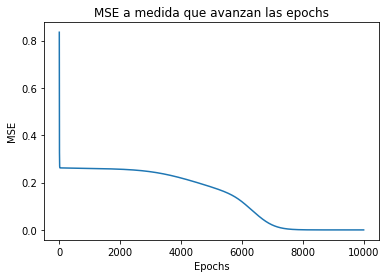

In [54]:
plt.title("MSE a medida que avanzan las epochs")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.plot(range(10000), nnet.lista_MSE)

In [55]:
nnet.predict(1,0)

0.9996566223174732

In [56]:
nnet.predict(1,1)

0.0004401287131101661